In [1]:
%pylab inline
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy
import scipy.io as io
import scipy.sparse as sparse
from sklearn import model_selection

Populating the interactive namespace from numpy and matplotlib


# Homework 2
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.


**Your Group Member:**

- Neeraj Namani - 001616313
- Anish Reddy Yellakonda - 001607588
- Gayathri Srujana - 001615025

# Q1: Bias-Variance trade-off (20pt)
Let $\theta\in {R}^n$ be the unknown true means of our $n$ Gaussian distributions,i.e., we get a vector ${X}$ where each ${X}_i\sim {N}(\theta_i, \sigma^2), i=1,\dots, n$. We assume every Gaussian distribution has the same variance and is independent, but means can be different. Our job is to find the estimator $\hat{\theta}$ to minimize the expected error ${E}[\|\hat{\theta}-\theta\|_2^2]$.  All expectations are taken with respect to the random draws of the ${X}_i$ random variables.



---



## Q1.1 Derivation (5pt)
**Show** the Bias-Variance trade-off formula for the estimator
\begin{align}
{E}[\|\hat{\theta}-\theta\|_2^2] = {V}[\hat{\theta}]+\text{bias}^2[\hat{\theta}]
\end{align}
where ${V}[\hat{\theta}] = {E}[\|\hat{\theta} -{E}[\hat{\theta}]\|_2^2]$ and $\text{bias}^2[\hat{\theta}] = \|{E}[\hat{\theta}-\theta]\|_2^2$

# Your Solution:

Given Equation,


\begin{equation}
\mathbb{E}[\|\hat{\boldsymbol{\theta}} - \boldsymbol{\theta}\|_2^2] = \mathbb{V}[\hat{\boldsymbol{\theta}}] + \text{Bias}^2[\hat{\boldsymbol{\theta}}].
\end{equation}



We introduce the expected value of the estimator to decompose the error:


\begin{equation}
\mathbb{E}[\|\hat{\boldsymbol{\theta}} - \boldsymbol{\theta}\|_2^2] = \mathbb{E}[\|\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}] + \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta}\|_2^2].
\end{equation}


Using the property of norms, expand the squared term:

\begin{equation}
\mathbb{E}[\|\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}]\|_2^2 + \|\mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta}\|_2^2 + 2 (\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}])^T (\mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta})].
\end{equation}

The cross-term vanishes and


\begin{equation}
\mathbb{E}[(\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}])^T (\mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta})] = 0.
\end{equation}


Thus,

\begin{equation}
\mathbb{E}[\|\hat{\boldsymbol{\theta}} - \boldsymbol{\theta}\|_2^2] = \mathbb{E}[\|\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}]\|_2^2] + \|\mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta}\|_2^2.
\end{equation}


Thus, the Bias-Variance trade-off formula is:


\begin{equation}
\boxed{\mathbb{E}[\|\hat{\boldsymbol{\theta}} - \boldsymbol{\theta}\|_2^2] = \mathbb{V}[\hat{\boldsymbol{\theta}}] + \text{Bias}^2[\hat{\boldsymbol{\theta}}]}.
\end{equation}





---


If we only observe one data, which is just ${X}$. Of course, the most natural choice of the estimator is $\hat{\theta}={X}$.

---


## Q1.2 $\text{Bias}^2$ and Variance for natural estimator (5pt)
What is the $\text{Bias}^2$ and variance of the natural estimator $\hat{\theta}={X}$?


# Your Solution:

For the natural estimator $\hat{\boldsymbol{\theta}} = \boldsymbol{X}$, where each $\boldsymbol{X}_i \sim \mathcal{N}(\theta_i, \sigma^2)$, we need to compute both the bias squared and the variance of the estimator.

The bias of the estimator $\hat{\boldsymbol{\theta}} = \boldsymbol{X}$ is defined as:


\begin{equation}
\text{Bias}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta}.
\end{equation}


Since $\hat{\boldsymbol{\theta}} = \boldsymbol{X}$ and we know $\mathbb{E}[\boldsymbol{X}_i] = \theta_i$ for each $i$, the expected value of the estimator is:


\begin{equation}
\mathbb{E}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\boldsymbol{X}] = \boldsymbol{\theta}.
\end{equation}


Therefore, the bias is:


\begin{equation}
\text{Bias}[\hat{\boldsymbol{\theta}}] = \boldsymbol{\theta} - \boldsymbol{\theta} = 0.
\end{equation}


Thus, the squared bias is:


\begin{equation}
\text{Bias}^2[\hat{\boldsymbol{\theta}}] = \|\boldsymbol{0}\|_2^2 = 0.
\end{equation}


The variance of the estimator $\hat{\boldsymbol{\theta}} = \boldsymbol{X}$ is given by:


\begin{equation}
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\|\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}]\|_2^2].
\end{equation}


Since $\mathbb{E}[\hat{\boldsymbol{\theta}}] = \boldsymbol{\theta}$, we have:


\begin{equation}
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\|\boldsymbol{X} - \boldsymbol{\theta}\|_2^2].
\end{equation}


Each $\boldsymbol{X}_i \sim \mathcal{N}(\theta_i, \sigma^2)$, so the variance of each $(\boldsymbol{X}_i)$ is $(\sigma^2)$. Therefore, the total variance is the sum of the variances of the individual components:


\begin{equation}
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \sum_{i=1}^n \text{Var}(\boldsymbol{X}_i) = \sum_{i=1}^n \sigma^2 = n\sigma^2.
\end{equation}


- The squared bias is: $0$.
- The variance is: $n\sigma^2$.






---

Let's try a different estimator, shrinkage estimator, $\hat{\theta}=\frac{9}{10}{X}$

---


## Q1.3 $\text{Bias}^2$ and Variance for shrinkage estimator (5pt)
What is the $\text{Bias}^2$ and variance of the shrinkage estimator $\hat{\theta}=\frac{9}{10}{X}$?


# Your Solution:

For the shrinkage estimator $(\hat{\boldsymbol{\theta}} = \frac{9}{10} \boldsymbol{X})$, where each $(\boldsymbol{X}_i \sim \mathcal{N}(\theta_i, \sigma^2))$, we need to compute the bias squared and the variance.

We need to calculate the bias, \
The bias of the estimator $(\hat{\boldsymbol{\theta}} = \frac{9}{10} \boldsymbol{X})$ is defined as:

$$
\text{Bias}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\hat{\boldsymbol{\theta}}] - \boldsymbol{\theta}.
$$

We know that $(\mathbb{E}[\boldsymbol{X}_i] = \theta_i)$, so the expected value of the estimator is:

$$
\mathbb{E}[\hat{\boldsymbol{\theta}}] = \mathbb{E}\left[\frac{9}{10} \boldsymbol{X}\right] = \frac{9}{10} \mathbb{E}[\boldsymbol{X}] = \frac{9}{10} \boldsymbol{\theta}.
$$

Thus, the bias is:

$$
\text{Bias}[\hat{\boldsymbol{\theta}}] = \frac{9}{10} \boldsymbol{\theta} - \boldsymbol{\theta} = \left(\frac{9}{10} - 1\right)\boldsymbol{\theta} = -\frac{1}{10} \boldsymbol{\theta}.
$$

The squared bias is then:

$$
\text{Bias}^2[\hat{\boldsymbol{\theta}}] = \left\| -\frac{1}{10} \boldsymbol{\theta} \right\|_2^2 = \frac{1}{100} \|\boldsymbol{\theta}\|_2^2.
$$

### Variance Calculation
The variance of the estimator $(\hat{\boldsymbol{\theta}} = \frac{9}{10} \boldsymbol{X})$ is given by:

$$
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \mathbb{E}[\|\hat{\boldsymbol{\theta}} - \mathbb{E}[\hat{\boldsymbol{\theta}}]\|_2^2].
$$

Since $(\hat{\boldsymbol{\theta}} = \frac{9}{10} \boldsymbol{X})$, the variance can be scaled as:

$$
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \left(\frac{9}{10}\right)^2 \mathbb{V}[\boldsymbol{X}].
$$

Each $(\boldsymbol{X}_i \sim \mathcal{N}(\theta_i, \sigma^2))$, so $(\mathbb{V}[\boldsymbol{X}] = \sigma^2)$, and thus:

$$
\mathbb{V}[\hat{\boldsymbol{\theta}}] = \left(\frac{9}{10}\right)^2 n \sigma^2 = \frac{81}{100} n \sigma^2.
$$

- The squared bias is: ${\frac{1}{100} \|\boldsymbol{\theta}\|_2^2}$.
- The variance is: ${\frac{81}{100} n \sigma^2}$.




---


## Q1.4 Which one is better? (5pt)
Suppose you know that the variance of our samples is quite a bit. Specifically assume $\sigma^2>\frac{1}{10}\theta_i^2$ for all $i$. Which estimator is better?

# Your Solution:

To determine which estimator is better given that $(\sigma^2 > \frac{1}{10} \theta_i^2)$ for all $i$, we need to compare the **total error** (bias squared + variance) of the two estimators:

1. **Natural Estimator**: $(\hat{\boldsymbol{\theta}} = \boldsymbol{X})$
   - **Squared Bias**: $0$
   - **Variance**: $n\sigma^2$
   - **Total Error**: $0 + n\sigma^2 = n\sigma^2$

2. **Shrinkage Estimator**: $(\hat{\boldsymbol{\theta}} = \frac{9}{10} \boldsymbol{X})$
   - **Squared Bias**: $\frac{1}{100} \|\boldsymbol{\theta}\|_2^2$
   - **Variance**: $\frac{81}{100} n\sigma^2$
   - **Total Error**:
   $$
   \frac{1}{100} \|\boldsymbol{\theta}\|_2^2 + \frac{81}{100} n\sigma^2
   $$

### Compare Total Errors
We need to compare the total error for each estimator and decide which one is better based on the given condition $(\sigma^2 > \frac{1}{10} \theta_i^2)$.

For the shrinkage estimator to be better, its total error must be less than that of the natural estimator. Thus, we need:
$$
\frac{1}{100} \|\boldsymbol{\theta}\|_2^2 + \frac{81}{100} n\sigma^2 < n\sigma^2
$$

Simplifying this inequality:
$$
\frac{1}{100} \|\boldsymbol{\theta}\|_2^2 < \frac{19}{100} n\sigma^2
$$

Multiply both sides by 100:
$$
\|\boldsymbol{\theta}\|_2^2 < 19n\sigma^2
$$

Since $(\|\boldsymbol{\theta}\|_2^2 = \sum_{i=1}^n \theta_i^2)$, this becomes:
$$
\sum_{i=1}^n \theta_i^2 < 19n\sigma^2
$$

Now using the given condition $(\sigma^2 > \frac{1}{10} \theta_i^2)$, we know that $(\sigma^2)$ dominates $(\theta_i^2)$, making the variance of the samples high. Therefore, the **shrinkage estimator** will reduce the total error by reducing the variance, even though it introduces some bias.


Given that $(\sigma^2 > \frac{1}{10} \theta_i^2)$, the **shrinkage estimator** is better because it reduces the variance significantly, and the added bias is relatively small compared to the reduction in variance. Thus, the total error is minimized by using the shrinkage estimator.




---



---



# Q2: Kernelized Regression (30pt)

 This problem will get you familiar with kernel ridge regression using the polynomial and RBF kernels.
 First, let's generate some data. Let $n=30$ and $f_*(x) = 4 \sin(\pi x)\cos(6\pi x^2)$.
For $i=1,\dots,n$ let each $x_i$ be drawn uniformly at random from $[0,1]$, and let $y_i = f_*(x_i) + \epsilon_i$ where $\epsilon_i \sim \mathcal{N}(0,1)$.
For any function $f$, the true error and the train error are respectively defined as:
$$\mathcal{E}_{\rm true}(f) = \mathbb{E}_{X,Y}\left[(f(X) - Y)^2\right], \quad \quad  \widehat{\mathcal{E}}_{\rm train}(f) =  \frac{1}{n} \sum_{i=1}^n \left(f(x_i)-y_i\right)^2.$$
Now, our goal is, using kernel ridge regression, to construct a predictor:
$$\widehat{\alpha} = \arg\min_\alpha \|K\alpha - y\|_2^2 + \lambda \alpha^\top K \alpha \ , \quad \quad \widehat{f}(x) = \sum_{i=1}^n \widehat{\alpha}_i k(x_i,x)$$
where $K\in\mathbb{R}^{n\times n}$ is the kernel matrix such that $K_{i,j} = k(x_i,x_j)$, and $\lambda\geq 0$ is the regularization constant.



---

## Q2.1: Find parameters for kernels (20pt)
Using leave-one-out cross validation, find a good $\lambda$ and hyperparameter settings for the following kernels:

- $k_{\rm poly}(x,z) = (1+x^\top z)^d$ where $d \in \mathbb{N}$ is a hyperparameter,
- $k_{\rm rbf}(x,z) = \exp(-\gamma \|x-z\|_2^2)$ where $\gamma > 0$ is a hyperparameter. Given a dataset $x_1,\dots,x_n \in \mathbb{R}^d$, a heuristic for choosing a range of $\gamma$ in the right ballpark is the inverse of the median of all $\binom{n}{2}$ squared distances $\|x_i-x_j\|^2$.


We strongly recommend implementing either [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)
or [random search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Random_search).
**Do not use sklearn**, but actually implement of these algorithms. Reasonable values to look through in this problem are: $\lambda \in 10^{[-5, -1]}$ and $d \in [5, 25]$. You do **not** need to search over $\gamma$ (you can use the heuristic), but if you would like to, a reasonable place to start would be to sample from a narrow gaussian distribution centered at the value described above.

Report the values of $d$, $\lambda$, and $\gamma$ for both kernels.

In [2]:
# Q2.1 Your code starts here
import numpy as np

# Generating Data
np.random.seed(0)
n = 30
x = np.random.uniform(0, 1, n)

def f_star(x):
    return 4 * np.sin(np.pi * x) * np.cos(6 * np.pi * x ** 2)

y = f_star(x) + np.random.normal(0, 1, n)


# Polynomial kernel function
def poly_kernel(x, z, d):
    return (1 + np.dot(x, z)) ** d

# RBF kernel function
def rbf_kernel(x, z, gamma):
    return np.exp(-gamma * np.linalg.norm(x - z) ** 2)


def kernel_ridge_regression(K, y, lam):
    # Solve (K + λI)α = y for α
    n = len(y)
    alpha = np.linalg.solve(K + lam * np.eye(n), y)
    return alpha

# Prediction function
def predict(alpha, X_train, x_test, kernel_func, **kernel_params):
    return np.sum([alpha[i] * kernel_func(X_train[i], x_test, **kernel_params) for i in range(len(alpha))])


def loo_cv(X, y, kernel_func, lam, **kernel_params):
    n = len(y)
    errors = []

    for i in range(n):
        X_train = np.delete(X, i)
        y_train = np.delete(y, i)

        K_train = np.array([[kernel_func(X_train[i], X_train[j], **kernel_params) for j in range(n-1)] for i in range(n-1)])

        alpha = kernel_ridge_regression(K_train, y_train, lam)

        y_pred = predict(alpha, X_train, X[i], kernel_func, **kernel_params)
        errors.append((y_pred - y[i]) ** 2)

    return np.mean(errors)


lambdas = 10 ** np.linspace(-5, -1, 5)
d_values = np.arange(5, 26, 5)

pairwise_sq_dists = np.array([np.linalg.norm(x[i] - x[j]) ** 2 for i in range(n) for j in range(i+1, n)])
gamma_heuristic = 1 / np.median(pairwise_sq_dists)

# Perform grid search for the polynomial kernel
best_poly_params = None
best_poly_error = float('inf')

for lam in lambdas:
    for d in d_values:
        error = loo_cv(x, y, poly_kernel, lam, d=d)
        if error < best_poly_error:
            best_poly_error = error
            best_poly_params = (lam, d)

# Perform grid search for the RBF kernel
best_rbf_params = None
best_rbf_error = float('inf')

for lam in lambdas:
    error = loo_cv(x, y, rbf_kernel, lam, gamma=gamma_heuristic)
    if error < best_rbf_error:
        best_rbf_error = error
        best_rbf_params = (lam, gamma_heuristic)


print("Best polynomial kernel parameters: λ = {}, d = {}".format(best_poly_params[0], best_poly_params[1]))
print("Best RBF kernel parameters: λ = {}, γ = {}".format(best_rbf_params[0], best_rbf_params[1]))


Best polynomial kernel parameters: λ = 0.001, d = 25
Best RBF kernel parameters: λ = 0.01, γ = 11.383614798130512


# Your Solution:



---

# Q2.2: Plot functions (10pt)
 Let $\widehat{f}_{\rm poly}(x)$ and $\widehat{f}_{\rm rbf}(x)$ be the functions learned using the hyperparameters you found in Q2.1.
For a single plot per function $\widehat{f} \in \left\lbrace \widehat{f}_{\rm poly}(x), \widehat{f}_{\rm rbf}(x) \right\rbrace$, plot the original data $\{(x_i,y_i)\}_{i=1}^n$, the true $f(x)$, and $\widehat{f}(x)$ (i.e., define a fine grid on $[0,1]$ to plot the functions). Make Two plots. One plot for each function.


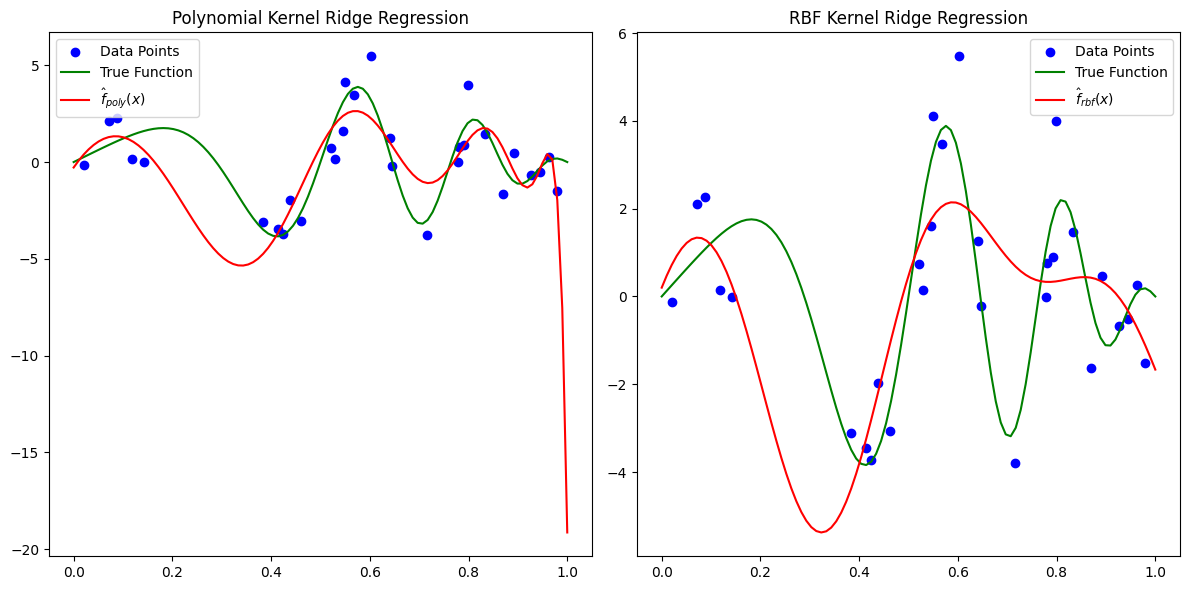

In [3]:
# Q2.2 Your code starts here
best_poly_d = 25
best_poly_lambda = 0.001
best_rbf_lambda = 0.01
best_rbf_gamma = 11.383614798130512

x_grid = np.linspace(0, 1, 100)

f_true_values = f_star(x_grid)

K_poly = np.array([[poly_kernel(x[i], x[j], best_poly_d) for j in range(n)] for i in range(n)])
alpha_poly = kernel_ridge_regression(K_poly, y, best_poly_lambda)

K_rbf = np.array([[rbf_kernel(x[i], x[j], best_rbf_gamma) for j in range(n)] for i in range(n)])
alpha_rbf = kernel_ridge_regression(K_rbf, y, best_rbf_lambda)

f_poly_values = np.array([predict(alpha_poly, x, xi, poly_kernel, d=best_poly_d) for xi in x_grid])
f_rbf_values = np.array([predict(alpha_rbf, x, xi, rbf_kernel, gamma=best_rbf_gamma) for xi in x_grid])

plt.figure(figsize=(12, 6))

# Plot for polynomial kerne
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_grid, f_true_values, color='green', label='True Function')
plt.plot(x_grid, f_poly_values, color='red', label='$\hat{f}_{poly}(x)$')
plt.title('Polynomial Kernel Ridge Regression')
plt.legend()

# Plot for RBF kernel
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_grid, f_true_values, color='green', label='True Function')
plt.plot(x_grid, f_rbf_values, color='red', label='$\hat{f}_{rbf}(x)$')
plt.title('RBF Kernel Ridge Regression')
plt.legend()

plt.tight_layout()
plt.show()




---



---


# Q3: Random Fourier Features (50pt)
This question is going to answer why Homework 1 Q2.4 works so well.

Kernel methods such as Logistic Regression are considered memory-based learners. Rather than learning a mapping from a set of input features $\mathcal{X} \subset \mathbb{R}^d$ to outputs in $\mathcal{Y}$, they remember all training examples $(\mathbf{x_i}, y_i)$ and learn a corresponding weight for them.

\begin{align*}
    \hat{f}(\mathbf{x}) = \sum_{i=1}^N \omega_i k(\mathbf{x_i}, \mathbf{x})
\end{align*}

After learning the weight vector $\mathbf{w} = [\mathbf{w}_1, ..., \mathbf{w}_N]$, we can make prediction on unseen samples using the **kernel function** $k$ between all training samples and $\mathbf{x}$. Kernel methods are attractive because they rely on the \textit{kernel trick}. Any positive definite function $k(\mathbf{x}, \mathbf{x}')$ with $\mathbf{x}, \mathbf{x}' \in \mathbb{R}^d$ defines a function $\psi$ mapping $\mathbb{R}^d$ to a higher-dimensional space such that the inner product between datapoints can be quickly computed as $\langle \psi(\mathbf{x}), \psi(\mathbf{x}') \rangle = k(\mathbf{x}, \mathbf{x}')$. In essence, the kernel trick is an efficient way to learn a linear decision boundary in a higher dimension space than that of $\mathcal{X}$.

The kernel trick can be prohibitively expensive for large datasets. This is because the memory-based algorithm accesses the data through evaluations of the kernel matrix $k(x, x')$ which grows in proportion to the dataset size $N$.

Instead of relying on the implicit feature mapping $\psi$ provided by the kernel trick, suppose we can approximate the kernel function $k$ as the inner product of two vectors in $\mathbb{R}^D$. Mathematically, we would like to find a mapping $\mathbf{z}$.

\begin{align*}
    \mathbf{z} : \mathbb{R}^d \rightarrow \mathbb{R}^D \qquad \text{such that} \qquad k_p(\mathbf{x}, \mathbf{x}') = \langle \psi(\mathbf{x}), \psi(\mathbf{x}') \rangle \approx \langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x}') \rangle
\end{align*}

With this approximation, we no longer require the kernel trick to express $\langle \psi(\mathbf{x}), \psi(\mathbf{x}')\rangle$ as $k(\mathbf{x}, \mathbf{x}')$. Rather, we can approximate it by directly computing the tractable inner product $\langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x}')\rangle$.
\begin{align*}
    \hat{f}(\mathbf{x}) = \sum_{i=1}^N \mathbf{\omega}_i k(\mathbf{x}_i, \mathbf{x}) = \sum_{i=1}^N \mathbf{\omega}_i  \langle \psi(\mathbf{x}_i), \psi(\mathbf{x}) \rangle \approx  \sum_{i=1}^N \mathbf{\omega}_i \langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x})\rangle = \left(\sum_{i=1}^N \mathbf{\omega}_i \mathbf{z}(\mathbf{x}_i)^T \right) \mathbf{z}(\mathbf{x}) = \beta^T \mathbf{z}(\mathbf{x})
\end{align*}

Assuming $\mathbf{z}(\mathbf{x}) = \sigma(M \mathbf{x} + b)$ for some nonlinear function $\sigma$, this ``approximate'' Logistic Regression can potentially be evaluated much quicker than the kernel Logistic Regression.
To see why, note that the left-hand-side requires evaluating $k(\mathbf{x_i}, \mathbf{x})$ for all $i \in \{1,\dots,N\}$, in general, if $\omega_i$ is not sparse.
On the other hand, the right-hand-side just requires computing $\mathbf{z}(\mathbf{x})=\sigma(M \mathbf{x} + b)$ which is dominated by the time to compute a $D \times d$ matrix-vector product, and then inner product with $\beta$ which is $\mathbb{R}^D$.
Thus, the total computation time for the left-hand-side scales linearly with $N$, and the right-hand-side scales with just $d$ and $D$, independent of $N$!

When training the approximate Logistic Regression we also get similar computational savings if $N \gg \max\{d,D\}$.


## Q3.1: Deriving Random Fourier Features
Bochner's theorem states that a continuous kernel $k(\mathbf{x}, \mathbf{x}') = k(\mathbf{x}-\mathbf{x}')$ on $\mathbb{R}^d$ is positive definite if and only if $k$ is the Fourier transform of a non-negative measure. While we won't delve into the logic of Fourier transforms here, this theorem lets us express the kernel as follows: for any probability distribution $p(\mathbf{w})$ define
\begin{align*}
    k_p(\mathbf{x}, \mathbf{x}') := \int_{\mathbb{R}^d} p(\mathbf{w}) e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}dw = \mathbb{E}_{\mathbf{w}} \left[e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}\right]
\end{align*}
where $i = \sqrt{-1}$, the imaginary unit. While any choice of $p(\mathbf{w})$ induces a valid kernel, in this problem we'll be focusing on the Gaussian distribution, namely
\begin{align*}
    p(\mathbf{w}) = (2\pi\sigma^2)^{-\frac{D}{2}}e^{-\frac{1}{2 \sigma^2} \vert\vert \mathbf{w} \vert\vert ^2_2} = (2\pi/\gamma^2)^{-\frac{D}{2}}e^{-\gamma^2 \vert\vert \mathbf{w} \vert\vert ^2_2/2} \quad \text{where} \ \gamma = \frac{1}{\sigma}
\end{align*}
We'll use this Fourier-transform interpretation of $k$ to derive a randomized mapping $\mathbf{z}: \mathbb{R}^d \rightarrow \mathbb{R}^D$ which is an unbiased estimate of the kernel function i.e.
\begin{align*}
            \mathbb{E}_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}
If $\mathbf{z}(x)^T \mathbf{z}(x')$ serves as a good approximation to the kernel matrix, we can apply the aforementioned approximation algorithm.


---


### Q3.1.1 Step 1 (5pt)
Use Euler's formula $e^{iy} = \cos(y) + i \sin(y)$ to show that $k_p(\mathbf{x}, \mathbf{x}') = E_{\mathbf{w}} \left[\cos(\mathbf{w}^T(\mathbf{x}-\mathbf{x}')) \right]$.

**Hint:** If both $x$ and $A$ are real, then $A = \int f(x) + ig(x) dx = \int f(x) dx $.



# Your Solution:

To show that $( k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[\cos(\mathbf{w}^T(\mathbf{x}-\mathbf{x}')) \right]$,

### Apply Euler's Formula

Euler's formula states that:
\begin{equation}
e^{iy} = \cos(y) + i \sin(y)
\end{equation}
where $y$ is a real number.

Now, let's apply Euler's formula to the expression inside the expectation for the kernel function:

\begin{equation}
e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}
\end{equation}

Using Euler's formula for  $y = \mathbf{w}^T(\mathbf{x} - \mathbf{x}')$, we have:
\begin{equation}
e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')} = \cos(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) + i \sin(\mathbf{w}^T (\mathbf{x} - \mathbf{x}'))
\end{equation}

### Expectation

The kernel function $k_p(\mathbf{x}, \mathbf{x}')$ is defined as the expectation of the exponential term:
\begin{equation}
k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[ e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')} \right]
\end{equation}

Substituting the Euler's formula expansion into this expression:
\begin{equation}
k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[ \cos(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) + i \sin(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) \right]
\end{equation}

### Simplification

The expectation of a complex number can be separated into the real and imaginary parts. Since the imaginary part, $\sin(\mathbf{w}^T (\mathbf{x} - \mathbf{x}'))$, integrates to zero because the Gaussian distribution  $p(\mathbf{w})$ is symmetric, we can focus only on the real part:

\begin{equation}
k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[ \cos(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) \right]
\end{equation}

Thus, we have derived the desired result:
\begin{equation}
k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[\cos(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) \right]
\end{equation}

This shows that the kernel function can be approximated by the expectation of the cosine of the inner product between $\mathbf{w}$ and the difference $\mathbf{x} - \mathbf{x}'$, as required.




---


### Q3.1.2: Step 2 (10pt)
We begin by defining $z_{\mathbf{w}} : \mathbb{R}^d \rightarrow \mathbb{R}$ as
\begin{align*}
    z_{\mathbf{w}}(\textbf{x}) &= \sqrt{2} \cos (\mathbf{w}^T\mathbf{x} + b) & \text{where} \  \mathbf{w} \sim p(\mathbf{w}), \ b &\sim \text{Uniform}(0, 2\pi)
\end{align*}
Note that this is not yet the mapping vector $\mathbf{z}$, but rather a mapping to $\mathbb{R}$. Use part (i) to show that the expected product of $z_\mathbf{w}(\mathbf{x})$s is an unbiased estimate of the kernel function i.e.
\begin{align*}
     E_{\mathbf{w}, b}\left[z_{\mathbf{w}}(\mathbf{x})z_{\mathbf{w}}(\mathbf{x}')\right] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}

**Hint:** For this problem you may use the following identity: $2\cos(\alpha) \cos(\beta) = \cos(\alpha+\beta) + \cos(\alpha - \beta)$.

# Your Solution:

To show that the expected product of $z_\mathbf{w}(\mathbf{x})$ and $z_\mathbf{w}(\mathbf{x}')$ is an unbiased estimate of the kernel function,

#### Define $z_\mathbf{w}(\mathbf{x})$
We are given:
\begin{equation}
z_{\mathbf{w}}(\mathbf{x}) = \sqrt{2} \cos (\mathbf{w}^T\mathbf{x} + b)
\end{equation}
where $\mathbf{w} \sim p(\mathbf{w})$ and $b \sim \text{Uniform}(0, 2\pi)$.

#### Compute the Expected Product
We need to compute the expectation:
\begin{equation}
\mathbb{E}_{\mathbf{w}, b}\left[ z_{\mathbf{w}}(\mathbf{x}) z_{\mathbf{w}}(\mathbf{x}') \right]
\end{equation}

Substituting the expression for $z_{\mathbf{w}}(\mathbf{x})$ and $z_{\mathbf{w}}(\mathbf{x}')$, we get:
\begin{equation}
\mathbb{E}_{\mathbf{w}, b}\left[ \sqrt{2} \cos(\mathbf{w}^T \mathbf{x} + b) \cdot \sqrt{2} \cos(\mathbf{w}^T \mathbf{x}' + b) \right]
\end{equation}

Simplifying:
\begin{equation}
2 \cdot \mathbb{E}_{\mathbf{w}, b} \left[ \cos(\mathbf{w}^T \mathbf{x} + b) \cdot \cos(\mathbf{w}^T \mathbf{x}' + b) \right]
\end{equation}

#### Trigonometric Identity
Using the given trigonometric identity:
\begin{equation}
2 \cos(\alpha) \cos(\beta) = \cos(\alpha + \beta) + \cos(\alpha - \beta)
\end{equation}
Set $\alpha = \mathbf{w}^T \mathbf{x} + b$ and $\beta = \mathbf{w}^T \mathbf{x}' + b $
. Applying the identity:
\begin{equation}
2 \cos(\mathbf{w}^T \mathbf{x} + b) \cos(\mathbf{w}^T \mathbf{x}' + b) = \cos\left((\mathbf{w}^T \mathbf{x} + b) + (\mathbf{w}^T \mathbf{x}' + b)\right) + \cos\left((\mathbf{w}^T \mathbf{x} + b) - (\mathbf{w}^T \mathbf{x}' + b)\right)
\end{equation}
Simplifying the expressions inside the cosines:
\begin{equation}
= \cos\left(\mathbf{w}^T (\mathbf{x} + \mathbf{x}') + 2b\right) + \cos\left(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')\right)
\end{equation}

#### Take Expectation Over \( b \)
Since $b \sim \text{Uniform}(0, 2\pi)$, the expectation of $\cos(2b)$ is 0:
\begin{equation}
\mathbb{E}_b \left[ \cos\left(\mathbf{w}^T (\mathbf{x} + \mathbf{x}') + 2b\right) \right] = 0
\end{equation}
Thus, we are left with:
\begin{equation}
\mathbb{E}_{\mathbf{w}, b}\left[z_{\mathbf{w}}(\mathbf{x}) z_{\mathbf{w}}(\mathbf{x}')\right] = \mathbb{E}_{\mathbf{w}}\left[ \cos\left(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')\right) \right]
\end{equation}

#### Relate to Kernel Function
From Step 1 of the previous part, we know that:
\begin{equation}
k_p(\mathbf{x}, \mathbf{x}') = \mathbb{E}_{\mathbf{w}} \left[\cos\left(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')\right)\right]
\end{equation}
Thus, we have shown that:
\begin{equation}
\mathbb{E}_{\mathbf{w}, b} \left[ z_{\mathbf{w}}(\mathbf{x}) z_{\mathbf{w}}(\mathbf{x}') \right] = k_p(\mathbf{x}, \mathbf{x}')
\end{equation}

This completes the derivation, showing that the expected product of $z_\mathbf{w}(\mathbf{x})$ and $z_\mathbf{w}(\mathbf{x}')$ is indeed an unbiased estimate of the kernel function.




---


### Q3.1.3: Step 3 (10pt)
Now we're ready to define our random Fourier features $\mathbf{z}: \mathbb{R}^d \rightarrow \mathbb{R}^D$. Let $\mathbf{z}$ be the $d$-dimensional concatenation of $z_{\mathbf{w}}(\mathbf{x})$:
\begin{align*}
    \mathbf{z}(\mathbf{x}) &= \begin{bmatrix}
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_1}(\mathbf{x}) , \  
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_2}(\mathbf{x}) , \
       \dots
       , \
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_D}(\mathbf{x})
     \end{bmatrix}^T
\end{align*}
Use step 1 and 2 to show that the expected inner product of the mapping $\mathbf{z}$ is an unbiased estimate of the kernel function i.e.
\begin{align*}
    E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}


# Your Solution:

To show that the expected inner product of the mapping $\mathbf{z}$ is an unbiased estimate of the kernel function, we can follow the steps outlined below:

#### Define $\mathbf{z}(\mathbf{x})$

We are given the definition of the random Fourier features vector $\mathbf{z}(\mathbf{x})$ as the concatenation of $z_{\mathbf{w}_i}(\mathbf{x})$ for $i = 1, 2, \dots, D $:

\begin{equation}
\mathbf{z}(\mathbf{x}) = \begin{bmatrix}
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_1}(\mathbf{x}) , \  
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_2}(\mathbf{x}) , \
       \dots , \
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_D}(\mathbf{x})
     \end{bmatrix}^T
\end{equation}
Where each $z_{\mathbf{w}_i}(\mathbf{x}) = \sqrt{2} \cos (\mathbf{w}_i^T \mathbf{x} + b_i)$.

#### Compute the Expected Inner Product

We want to compute the expected inner product between $\mathbf{z}(\mathbf{x})$ and $\mathbf{z}(\mathbf{x}')$, which is given by:

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[ \mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') \right]
\end{equation}

Using the definition of $\mathbf{z}(\mathbf{x})$, the inner product becomes:

\begin{equation}
\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') = \frac{1}{D} \sum_{i=1}^D z_{\mathbf{w}_i}(\mathbf{x}) z_{\mathbf{w}_i}(\mathbf{x}')
\end{equation}

Thus, the expectation becomes:

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[ \mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') \right] = \frac{1}{D} \sum_{i=1}^D \mathbb{E}_{\mathbf{w}_i, b_i} \left[ z_{\mathbf{w}_i}(\mathbf{x}) z_{\mathbf{w}_i}(\mathbf{x}') \right]
\end{equation}

#### Apply the Result from Step 2

From **Step 2** of the previous part, we know that:

\begin{equation}
\mathbb{E}_{\mathbf{w}_i, b_i} \left[ z_{\mathbf{w}_i}(\mathbf{x}) z_{\mathbf{w}_i}(\mathbf{x}') \right] = \mathbb{E}_{\mathbf{w}_i} \left[ \cos(\mathbf{w}_i^T (\mathbf{x} - \mathbf{x}')) \right] = k_p(\mathbf{x}, \mathbf{x}')
\end{equation}

Since this holds for all, $i = 1, 2, \dots, D$ the sum simplifies to:

\begin{equation}
\frac{1}{D} \sum_{i=1}^D k_p(\mathbf{x}, \mathbf{x}') = k_p(\mathbf{x}, \mathbf{x}')
\end{equation}

Therefore, we have shown that:

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[ \mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') \right] = k_p(\mathbf{x}, \mathbf{x}')
\end{equation}

Thus, the expected inner product of the mapping $\mathbf{z}(\mathbf{x})$ is an unbiased estimate of the kernel function $k_p(\mathbf{x}, \mathbf{x}')$, as required.




---


## Q3.2: Random Fourier Features and the RBF Kernel. (10pt)
As mentioned above, using different distributions $p(\mathbf{w})$ induces different valid kernels.
Using the $p(\mathbf{w})$ given in Q3.1, show that expected value of the inner product between random Fourier features is the RBF kernel i.e.
\begin{align*}
    E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = \exp\left(-\frac{ \vert\vert\mathbf{x} - \mathbf{x}'\vert\vert_2^2}{2 \gamma^2}\right)
\end{align*}

**Hint:** The PDF for a variable $X \in \mathbb{R}^d$ following normal distribution with mean $\mu$ and covariance matrix $\Sigma$ is as follows:
\begin{align*}
    P(X = x) = ((2 \pi)^d |\Sigma|)^{-1/2} \exp{(-\frac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu))}
\end{align*}
where $|\Sigma| = \text{det}(\Sigma)$ denote the determinant of matrix $\Sigma$. In addition, if $\Sigma = \text{diag} (\sigma^2, \ldots, \sigma^2)$, then $|\Sigma| = \sigma^{2d}$, and $\Sigma^{-1} = \text{diag}(\sigma^{-2}, \ldots, \sigma^{-2})$.



# Your solution:

To show that the expected value of the inner product between random Fourier features is the Radial Basis Function (RBF) kernel,

From Q3.1, we defined the random Fourier features $\mathbf{z}(\mathbf{x})$ as:

\begin{equation}
\mathbf{z}(\mathbf{x}) = \frac{1}{\sqrt{D}} \begin{bmatrix}
       z_{\mathbf{w}_1}(\mathbf{x}), \
       z_{\mathbf{w}_2}(\mathbf{x}), \
       \dots, \
       z_{\mathbf{w}_D}(\mathbf{x})
     \end{bmatrix}^T
\end{equation}

Where each $z_{\mathbf{w}_i}(\mathbf{x}) = \sqrt{2} \cos(\mathbf{w}_i^T \mathbf{x} + b_i)$, and $\mathbf{w}_i \sim p(\mathbf{w})$.


The RBF (Radial Basis Function) kernel is given by:

\begin{equation}
k_{\text{RBF}}(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|_2^2}{2 \gamma^2}\right)
\end{equation}

Our goal is to show that the expected value of the inner product between the random Fourier features is equal to this kernel.

We are given that $\mathbf{w} \sim \mathcal{N}(0, \gamma^{-2} I_d)$, i.e., $\mathbf{w}$ follows a Gaussian distribution with zero mean and covariance matrix $\gamma^{-2} I_d$.

The probability density function (PDF) of \( \mathbf{w} \) is:

\begin{equation}
p(\mathbf{w}) = (2\pi/\gamma^2)^{-\frac{d}{2}} \exp\left(-\frac{\gamma^2}{2} \|\mathbf{w}\|_2^2\right)
\end{equation}

#### Expected Value of the Inner Product

We want to compute the expected inner product of the random Fourier features, which is:

\begin{equation}
\mathbb{E}_{\mathbf{w}}\left[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')\right]
\end{equation}

Substituting the definition of \( \mathbf{z}(\mathbf{x}) \):

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[ \frac{1}{D} \sum_{i=1}^D z_{\mathbf{w}_i}(\mathbf{x}) z_{\mathbf{w}_i}(\mathbf{x}') \right] = \mathbb{E}_{\mathbf{w}} \left[ \frac{1}{D} \sum_{i=1}^D \sqrt{2} \cos(\mathbf{w}_i^T \mathbf{x} + b_i) \sqrt{2} \cos(\mathbf{w}_i^T \mathbf{x}' + b_i) \right]
\end{equation}

By linearity of expectation and simplifying:

\begin{equation}
= \mathbb{E}_{\mathbf{w}} \left[ \cos(\mathbf{w}^T \mathbf{x}) \cos(\mathbf{w}^T \mathbf{x}') \right]
\end{equation}

We apply the trigonometric identity:

\begin{equation}
\cos(A) \cos(B) = \frac{1}{2} \left[\cos(A - B) + \cos(A + B)\right]
\end{equation}

Substituting $A = \mathbf{w}^T \mathbf{x}$ and $B = \mathbf{w}^T \mathbf{x}'$, we get:

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[\cos(\mathbf{w}^T \mathbf{x}) \cos(\mathbf{w}^T \mathbf{x}')\right] = \frac{1}{2} \mathbb{E}_{\mathbf{w}} \left[ \cos\left(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')\right) + \cos\left(\mathbf{w}^T (\mathbf{x} + \mathbf{x}')\right)\right]
\end{equation}

Since $\mathbf{w} \sim \mathcal{N}(0, \gamma^{-2} I_d)$, the expectation of $\cos(\mathbf{w}^T (\mathbf{x} + \mathbf{x}'))$ is zero because $\mathbf{w}^T (\mathbf{x} + \mathbf{x}')$ is a random variable with a Gaussian distribution whose expectation is zero.

Thus, we are left with:

\begin{equation}
\mathbb{E}_{\mathbf{w}} \left[ \cos(\mathbf{w}^T (\mathbf{x} - \mathbf{x}')) \right]
\end{equation}

This is the Fourier transform of the Gaussian distribution, which is known to be:

\begin{equation}
\exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|_2^2}{2 \gamma^2}\right)
\end{equation}

Therefore, we have shown that:

\begin{equation}
\mathbb{E}_{\mathbf{w}}\left[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')\right] = \exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|_2^2}{2 \gamma^2}\right)
\end{equation}






---


## Q3.3: Concentration Bounds (5pt)
In Q3.1 we derived our function $\mathbf{z}$ which serve as a good approximation to the kernel function. Our results let us get an upper bound our approximation error for the kernel function. Explain why we can apply **Hoeffding's inequality** (See HW1) to obtain
\begin{align*}
    p(|\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') - k(\mathbf{x}, \mathbf{x}')| \geq \epsilon) \leq 2 \exp \left(-D\epsilon^2/8\right)
\end{align*}  


# Your Solution:

To understand why we can apply **Hoeffding's inequality** to bound the approximation error for the kernel function, let's go through the reasoning step by step:

   - Our goal is to bound the error between the inner product of the approximated feature mappings $\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')$ and the true kernel function $k(\mathbf{x}, \mathbf{x}')$.

   - The function $\mathbf{z}(\mathbf{x})$ is constructed using random Fourier features. This means that $\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')$ is an average of random variables.

**Hoeffding's Inequality**:
   - Hoeffding's inequality is a tool for providing probabilistic bounds on the sum (or average) of independent and bounded random variables.
   - The inequality states that if $X_1, X_2, \ldots, X_n$ are independent random variables such that $a_i \leq X_i \leq b_i$ for all $i$, then for the mean $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$, we have:
     \begin{equation}
     P(|\bar{X} - \mathbb{E}[\bar{X}]| \geq \epsilon) \leq 2 \exp \left(-\frac{2 n^2 \epsilon^2}{\sum_{i=1}^n (b_i - a_i)^2}\right).
     \end{equation}

   - In our case, $\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')$ is an average of $D$ independent random variables (the terms that make up the inner product).
   - Each of these random variables is bounded because $\mathbf{z}(\mathbf{x})$ typically involves bounded trigonometric functions like $\sin$ and $\cos$.
   - We want to bound the deviation between the average (i.e., $\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')$ and its expected value $k(\mathbf{x}, \mathbf{x}')$.
   - Thus, we can use Hoeffding’s inequality with $n = D$ and the bounded range of the random variables to derive the bound.

   - Applying Hoeffding’s inequality gives us:
     \begin{equation}
     p(|\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') - k(\mathbf{x}, \mathbf{x}')| \geq \epsilon) \leq 2 \exp \left(-D \epsilon^2 / 8\right).
     \end{equation}
   - The factor of $8$ in the exponent comes from the bounds on the variance of the random variables involved in the approximation.







---


## Q3.4: Verify Q3.2 (10pt)
Remind that in HW 1 Q2.4. We mentioned as follows.
The standard solution to this is to come up with some
transform $h: \mathbb{R}^d \rightarrow \mathbb{R}^p$ of the original pixel values such that the transformed points are (more easily)
linearly separable. **This idea is very similar as SVM**. In this problem, you’ll use the feature transform:
\begin{align}
h(\mathbf{x}) = \cos(\mathbf{G}\mathbf{x}+\mathbf{b})
\end{align}
where $\mathbf{G}\in \mathbb{R}^{p\times d}$ and $\mathbf{b}\in \mathbb{R}^p$ and the cosine function is applied elementwise. We will choose $\mathbf{G}$ to be a random matrix, with each entry sampled i.i.d. from a Gaussian distribution with mean $\mu=0$ and $\sigma^2=0.1$. And $\mathbf{b}$ is a random vector sampled i.i.d. from the uniform distribution on $[0,2\pi]$.

Use the parameter and data above and design an algorithm to verify expected value of the inner product between random Fourier features is the RBF kernel. You don't need to use all the data since it might take too much time.


Mean approximation error: 0.0369


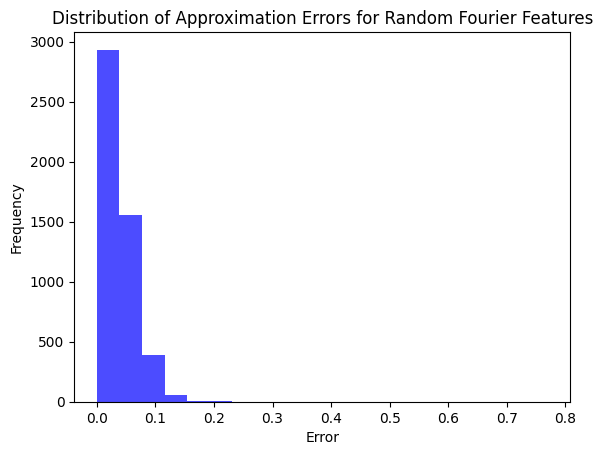

In [4]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# consider to make your training data set larger, maybe even to use the full training (60000).
# Normalize it by dividing 255.
Xtr                   = train_X/255
Ytr                   = train_y
Xte                   = test_X/255
Yte                   = test_y

# Q3.4 your code starts here

Xtr = Xtr.reshape(Xtr.shape[0], -1)
Xte = Xte.reshape(Xte.shape[0], -1)

# Parameters
d = Xtr.shape[1]
p = 500
n_samples = 100
gamma = 0.1

X_subset = Xtr[:n_samples, :]
# Generate G and b for the Fourier features
G = np.random.normal(0, np.sqrt(2 * gamma), (p, d))
b = np.random.uniform(0, 2 * np.pi, p)


def h(x, G, b):
    return np.sqrt(2 / p) * np.cos(np.dot(G, x) + b)

# Step 3: Compute inner products for random Fourier features
def compute_fourier_inner_product(x, x_prime, G, b):
    z_x = h(x, G, b)
    z_x_prime = h(x_prime, G, b)
    return np.dot(z_x, z_x_prime)

# Step 4: Compute RBF kernel directly
def compute_rbf_kernel(x, x_prime, gamma):
    return np.exp(-np.linalg.norm(x - x_prime) ** 2 / (2 * gamma ** 2))

# Step 5: Compare the Fourier feature inner product with RBF kernel for sample points
errors = []
for i in range(n_samples):
    for j in range(i + 1, n_samples):
        x = X_subset[i]
        x_prime = X_subset[j]


        fourier_inner_product = compute_fourier_inner_product(x, x_prime, G, b)

        rbf_value = compute_rbf_kernel(x, x_prime, gamma)

        error = np.abs(fourier_inner_product - rbf_value)
        errors.append(error)

mean_error = np.mean(errors)
print(f"\nMean approximation error: {mean_error:.4f}")

#print(errors)

# Plot the errors
plt.hist(errors, bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Approximation Errors for Random Fourier Features")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()
